Simulator...
x list [2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900]
Running sumo simulator
 Retrying in 1 seconds
Step #5400.00 (3ms ~= 83.33*RT, ~82000.00UPS, TraCI: 0ms, vehicles TOT 5999 ACT 246 BUF 0)tep #1125.00 (4ms ~= 62.50*RT, ~64250.00UPS, TraCI: 1ms, vehicles TOT 1081 ACT 257 BUF 0)ep #2250.00 (4ms ~= 62.50*RT, ~72500.00UPS, TraCI: 1ms, vehicles TOT 2425 ACT 290 BUF 0)p #3375.00 (5ms ~= 50.00*RT, ~59000.00UPS, TraCI: 0ms, vehicles TOT 3833 ACT 295 BUF 0) #4500.00 (4ms ~= 62.50*RT, ~62500.00UP

Step #5400.00 (6ms ~= 41.67*RT, ~72333.33UPS, TraCI: 0ms, vehicles TOT 7259 ACT 434 BUF 0)
x list [3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800]
Running sumo simulator
 Retrying in 1 seconds
ep #1125.00 (5ms ~= 50.00*RT, ~67800.00UPS, TraCI: 1ms, vehicles TOT 1363 ACT 339 BUF 0)ep #2250.00 (5ms ~= 50.00*RT, ~94400.00UPS, TraCI: 1ms, vehicles TOT 2988 ACT 472 BUF 0)p #3375.00 (6ms ~= 41.67*RT, ~107833.33UPS, TraCI: 1ms, vehicles TOT 4677 ACT 647 BUF 0

Step #5400.00 (5ms ~= 50.00*RT, ~86600.00UPS, TraCI: 0ms, vehicles TOT 7349 ACT 433 BUF 0)
MAIN modx [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Validator...
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[1, 6.25]]


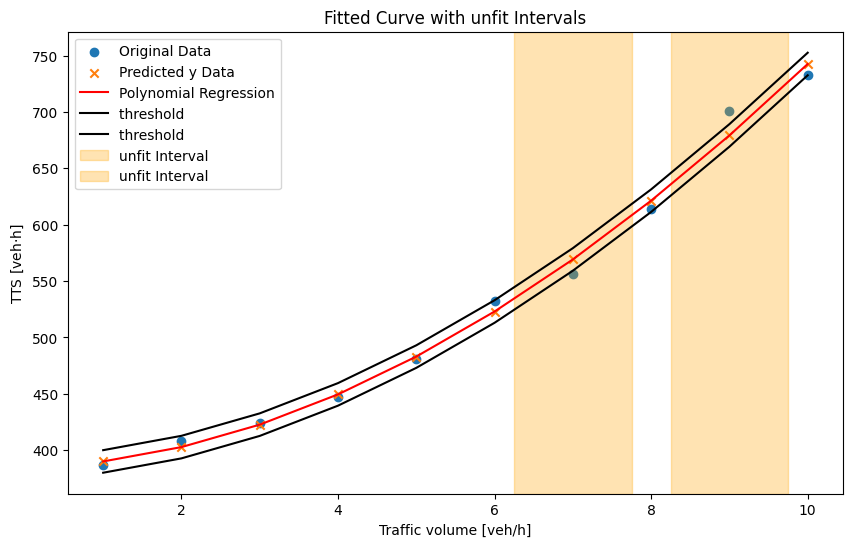

MAIN interval list from VAL: [[6.25, 7.75], [8.25, 9.75]]


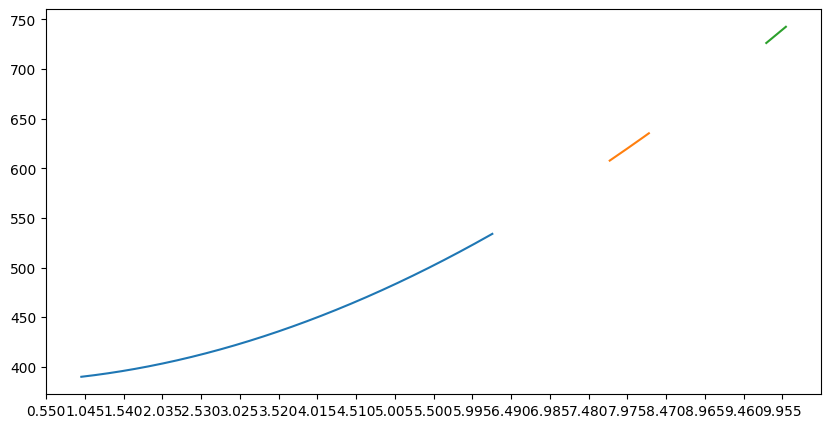

In [1]:
# IMPORT LIBRARIES
import numpy as np
import datetime

from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
from logger_utils import Logger

import pickle
import datetime
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)
        

validator_controller_novsl = ValidatorController("novsl")
logger = Logger()
logger_main_arguments = {}
is_main_func = True

# SUMO vsl
from controller_modifier_scenarios import Controller

# SUMO vsl generate modifiers [[1,[2900,...2900],[2,[3000,...3000]....]
modlist = Controller.get_list_of_modifiers(10)
# print(f"Mod list: {modlist}")
# mod_x_list = modlist

# Calls Simulator
# Input: list of ids and modifiers [[1,[2900,...2900],[2,[3000,...3000]....]
# Output: IDs,SIMULATED(values) [[1,388.88],[2,420.22]]
mod_xnv,sim_y_listnv = SimulatorController.simulator(modlist,selected_simulator=components['sumo_simulator_novsl_old'])
assert len(mod_xnv) == len(sim_y_listnv)

print("MAIN modx", mod_xnv)

# Calls Validator controller
intervals_list_novsl =  validator_controller_novsl.validate(mod_x_list=np.array(mod_xnv),sim_y_list=np.array(sim_y_listnv), selected_validator=components['validator'],global_interval=[1, 10])
print("MAIN interval list from VAL:", intervals_list_novsl)

filename1 = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
save_object(validator_controller_novsl,f"vc_novsl-{filename1}.pkl")


# MAIN cycle completed/interrupted -> write OVERALL statistics        
logger_main_arguments['log_contex'] = 'Overall Stats'                          
logger_main_arguments['main_status'] = 'end cycle'
logger.log_main(logger_main_arguments)

Modifier...
[MODC]: intervals list:  [[2500, 4000]]
[MODC]: (interval_min_tick, interval_max_tick):  (2500, 4000)
[MODC]: mod_ticks:  [2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900]
[MODC]: mod_x:  [2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0]
MAIN mod outcome ([[2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0]], [[2500, 4000]])
Simulator...
[[2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 36

Step #5400.00 (5ms ~= 50.00*RT, ~87200.00UPS, TraCI: 0ms, vehicles TOT 7349 ACT 436 BUF 0)
x list [3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0]
Running sumo simulator
 Retrying in 1 seconds
Step #3350.00 (7ms ~= 35.71*RT, ~100857.14UPS, TraCI: 0ms, vehicles TOT 4750 ACT 706 BUF 0tep #1125.00 (5ms ~= 50.00*RT, ~70200.00UPS, 

Step #5400.00 (6ms ~= 41.67*RT, ~76833.33UPS, TraCI: 0ms, vehicles TOT 7529 ACT 461 BUF 0)
MODX [2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0] and sim_y_list [346.1388888888888, 362.6805555555555, 372.5, 391.3055555555557, 396.61111111111103, 418.1666666666667, 425.0833333333333, 444.5, 481.09722222222234, 514.3055555555554, 595.3333333333331, 655.1527777777777, 720.3333333333335, 769.7777777777777]
MAIN modx [2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0]
Validator...
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[2500, 2600.0]]


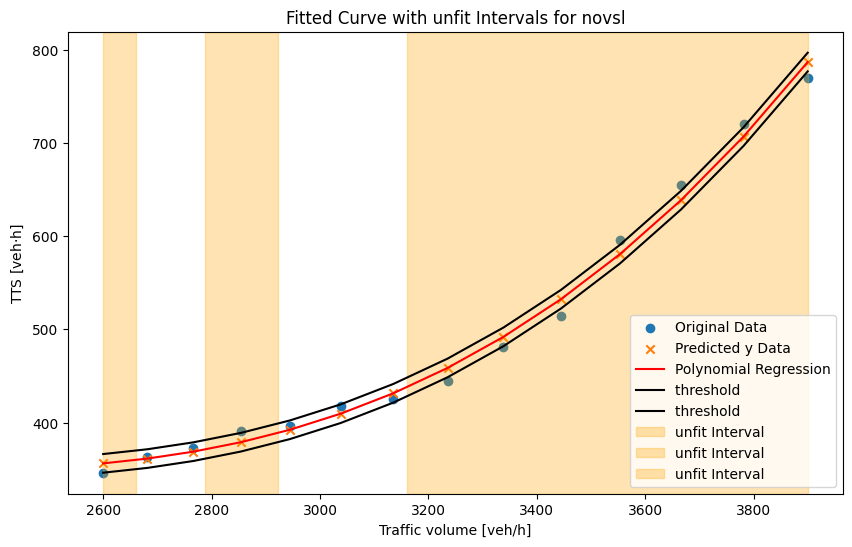

MAIN interval list from VAL: [[2600.0, 2661.153846153846], [2788.076923076923, 2921.923076923077], [3160.3846153846152, 3900.0]]
Modifier...
[MODC]: intervals list:  [[2600.0, 2661.153846153846], [2788.076923076923, 2921.923076923077], [3160.3846153846152, 3900.0]]
[MODC]: (interval_min_tick, interval_max_tick):  (2600.0, 2661.153846153846)
[MODC]: mod_ticks:  [2650]
[MODC]: mod_x:  [2650]
[MODC]: (interval_min_tick, interval_max_tick):  (2788.076923076923, 2921.923076923077)
[MODC]: mod_ticks:  [2800, 2875]
[MODC]: mod_x:  [2800.0, 2875.0]
[MODC]: (interval_min_tick, interval_max_tick):  (3160.3846153846152, 3900.0)
[MODC]: mod_ticks:  [3175, 3250, 3325, 3400, 3475, 3550, 3625, 3700, 3775, 3850]
[MODC]: mod_x:  [3175.0, 3243.594306049822, 3313.7900355871884, 3385.5871886120995, 3458.985765124555, 3533.985765124555, 3610.5871886120995, 3688.790035587189, 3768.594306049822, 3850.0]
MAIN mod outcome ([[2650], [2800.0, 2875.0], [3175.0, 3243.594306049822, 3313.7900355871884, 3385.58718861

Step #5400.00 (7ms ~= 35.71*RT, ~62714.29UPS, TraCI: 0ms, vehicles TOT 7169 ACT 439 BUF 0)
x list [3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594306049822, 3768.594

Step #5400.00 (6ms ~= 41.67*RT, ~73166.67UPS, TraCI: 0ms, vehicles TOT 7349 ACT 439 BUF 0)
x list [3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0, 3850.0]
Running sumo simulator
 Retrying in 1 seconds
ep #1125.00 (5ms ~= 50.00*RT, ~69200.00UPS, TraCI: 1ms, vehicles TOT 1381 ACT 346 BUF 0)ep #2250.00 (7ms ~= 35.71*RT, ~68714.29UPS, Tra

Step #5400.00 (6ms ~= 41.67*RT, ~77833.33UPS, TraCI: 0ms, vehicles TOT 7439 ACT 467 BUF 0)
MODX [2650, 2800.0, 2875.0, 3175.0, 3243.594306049822, 3313.7900355871884, 3385.5871886120995, 3458.985765124555, 3533.985765124555, 3610.5871886120995, 3688.790035587189, 3768.594306049822, 3850.0] and sim_y_list [356.02777777777777, 377.5555555555555, 387.11111111111103, 440.6249999999999, 460.72222222222223, 467.09722222222234, 496.0416666666664, 552.2916666666667, 577.8472222222221, 631.277777777778, 679.8888888888888, 708.0833333333333, 763.9722222222222]
MAIN modx [2650, 2800.0, 2875.0, 3175.0, 3243.594306049822, 3313.7900355871884, 3385.5871886120995, 3458.985765124555, 3533.985765124555, 3610.5871886120995, 3688.790035587189, 3768.594306049822, 3850.0]
Validator...
What are POINTS  [[2650.0, 356.02777777777777], [2800.0, 377.5555555555555], [2875.0, 387.11111111111103], [3175.0, 440.6249999999999], [3243.594306049822, 460.72222222222223], [3313.7900355871884, 467.09722222222234], [3385.58

/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


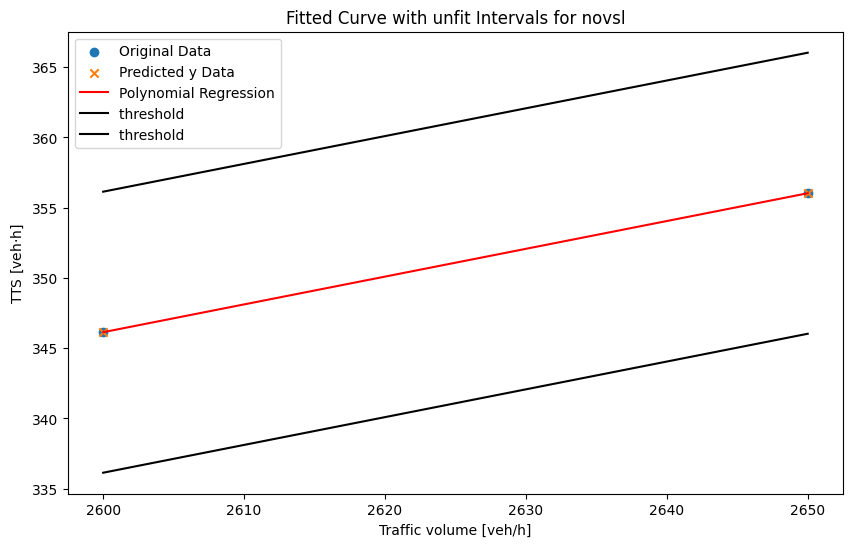

equation,
 y =  2.9178526499563515e-05x^2 + 0.044590513655071884x^1 + 32.956714248652645 
unfit_points
 [(2600.0, 346.1388888888888), (2650.0, 356.02777777777777)] 
local_unfit_interval
, [[2600.0, 2661.153846153846]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


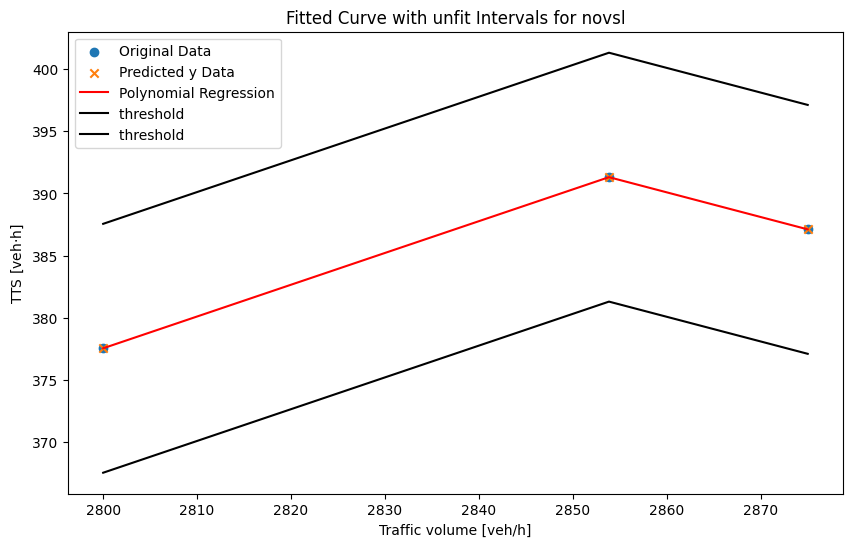

equation,
 y =  -1.0979928655881484e-17x^6  -1.4485871398927087e-16x^5 + 5.307283746464407e-11x^4 + 2.0305161480881378e-07x^3 + 0.00044002135385876485x^2 + 0.046622028947464686x^1  -5606.244510861305 
unfit_points
 [(2800.0, 377.5555555555555), (2853.846153846154, 391.3055555555557), (2875.0, 387.11111111111103)] 
local_unfit_interval
, [[2788.076923076923, 2921.923076923077]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3160.3846153846152, 3175.0]]


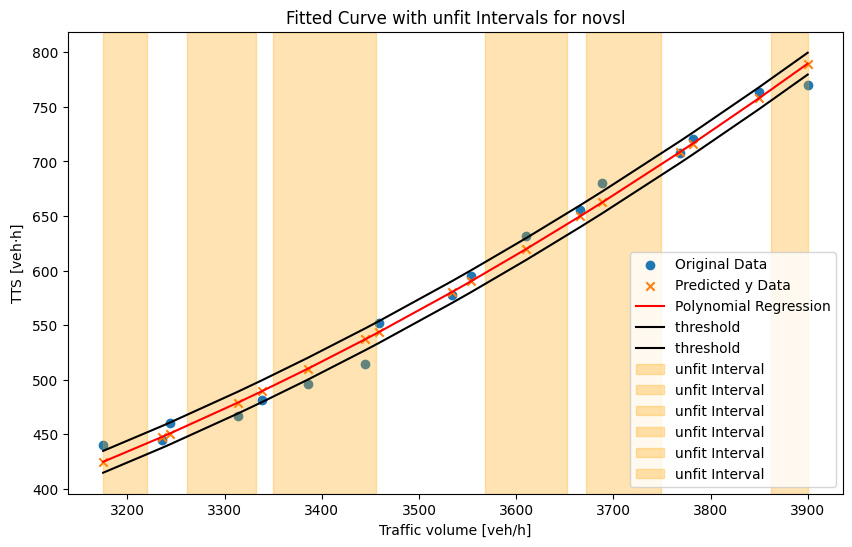

equation,
 y =  0.0001908439710786932x^2  -0.8471380843915818x^1 + 1190.666688398981 
unfit_points
 [(3175.0, 440.6249999999999), (3235.3846153846152, 444.5), (3243.594306049822, 460.72222222222223), (3313.7900355871884, 467.09722222222234), (3338.4615384615386, 481.09722222222234), (3385.5871886120995, 496.0416666666664), (3444.6153846153848, 514.3055555555554), (3458.985765124555, 552.2916666666667), (3533.985765124555, 577.8472222222221), (3553.846153846154, 595.3333333333331), (3610.5871886120995, 631.277777777778), (3666.153846153846, 655.1527777777777), (3688.790035587189, 679.8888888888888), (3768.594306049822, 708.0833333333333), (3781.5384615384614, 720.3333333333335), (3850.0, 763.9722222222222), (3900.0, 769.7777777777777)] 
local_unfit_interval
, [[3160.3846153846152, 3175.0], [3220.2884615384614, 3261.143238434164], [3332.293662742951, 3350.242950999179], [3455.3931699972627, 3568.0314125376403], [3652.2621817684094, 3671.8128935121817], [3748.643238434164, 3862.5]]
DIFFER

Step #5400.00 (4ms ~= 62.50*RT, ~108500.00UPS, TraCI: 1ms, vehicles TOT 7259 ACT 434 BUF 0
MODX [3200, 3300, 3400.0, 3450.0, 3600.0, 3650.0, 3700] and sim_y_list [446.8888888888889, 481.0694444444444, 532.4027777777778, 570.3333333333334, 613.8194444444445, 647.5416666666665, 701.0416666666665]
MAIN modx [3200, 3300, 3400.0, 3450.0, 3600.0, 3650.0, 3700]
Validator...
What are POINTS  [[3200.0, 446.8888888888889], [3300.0, 481.0694444444444], [3400.0, 532.4027777777778], [3450.0, 570.3333333333334], [3600.0, 613.8194444444445], [3650.0, 647.5416666666665], [3700.0, 701.0416666666665], [3175.0, 440.6249999999999], [3313.7900355871884, 467.09722222222234], [3385.5871886120995, 496.0416666666664], [3444.6153846153848, 514.3055555555554], [3610.5871886120995, 631.277777777778], [3688.790035587189, 679.8888888888888], [3900.0, 769.7777777777777]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


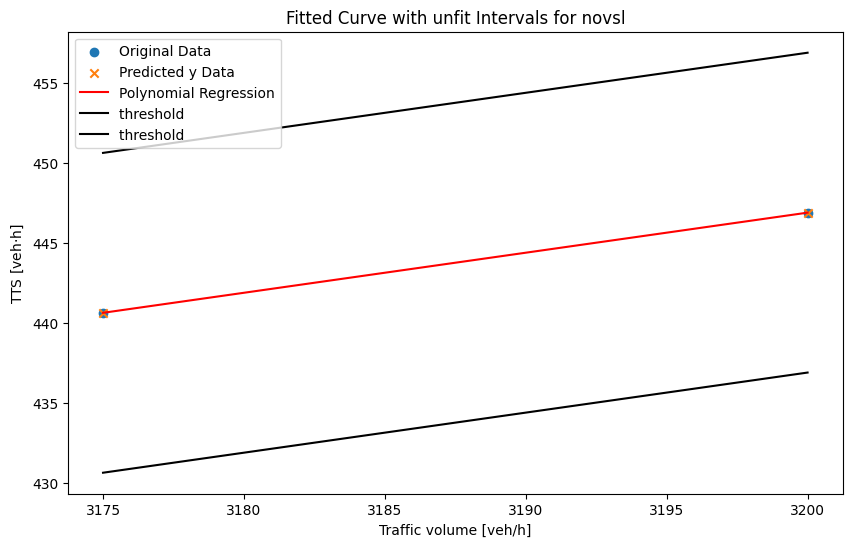

equation,
 y =  3.2023123545918804e-05x^2 + 0.046408142950332444x^1  -29.533953662383233 
unfit_points
 [(3175.0, 440.6249999999999), (3200.0, 446.8888888888889)] 
local_unfit_interval
, [[3175.0, 3220.2884615384614]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


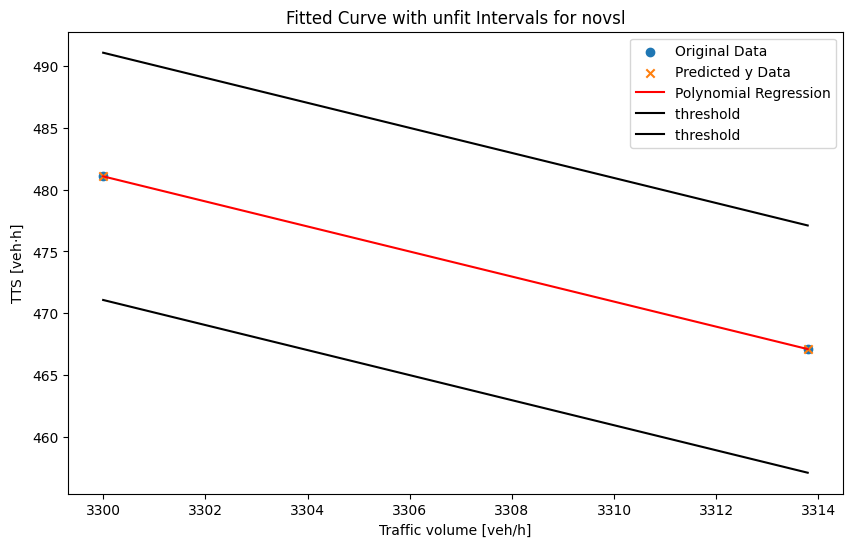

equation,
 y =  -0.00016042147282686284x^2 + 0.047782468942505395x^1 + 2070.377136018713 
unfit_points
 [(3300.0, 481.0694444444444), (3313.7900355871884, 467.09722222222234)] 
local_unfit_interval
, [[3261.143238434164, 3332.293662742951]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3350.242950999179, 3389.190391459075]]


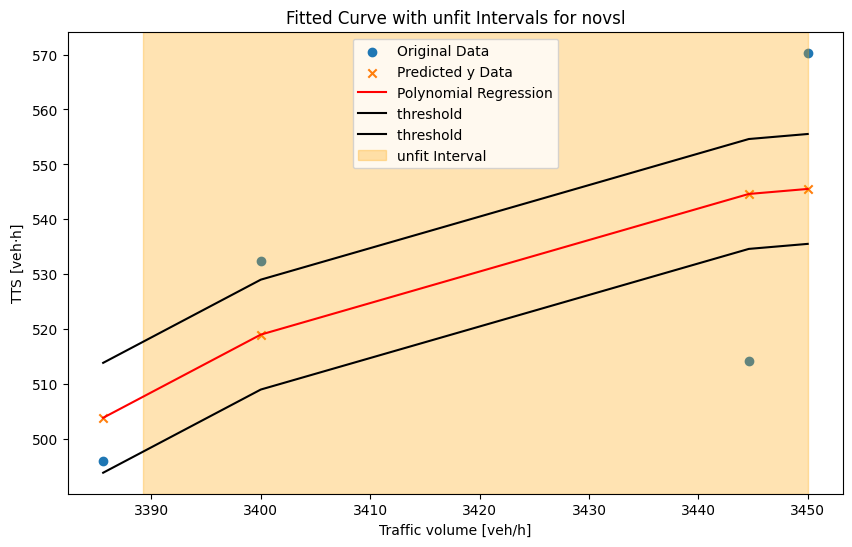

equation,
 y =  -0.008078998360953648x^2 + 55.87134257909155x^1  -96050.31395398374 
unfit_points
 [(3385.5871886120995, 496.0416666666664), (3400.0, 532.4027777777778), (3444.6153846153848, 514.3055555555554), (3450.0, 570.3333333333334)] 
local_unfit_interval
, [[3350.242950999179, 3389.190391459075], [3450.0, 3455.3931699972627]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


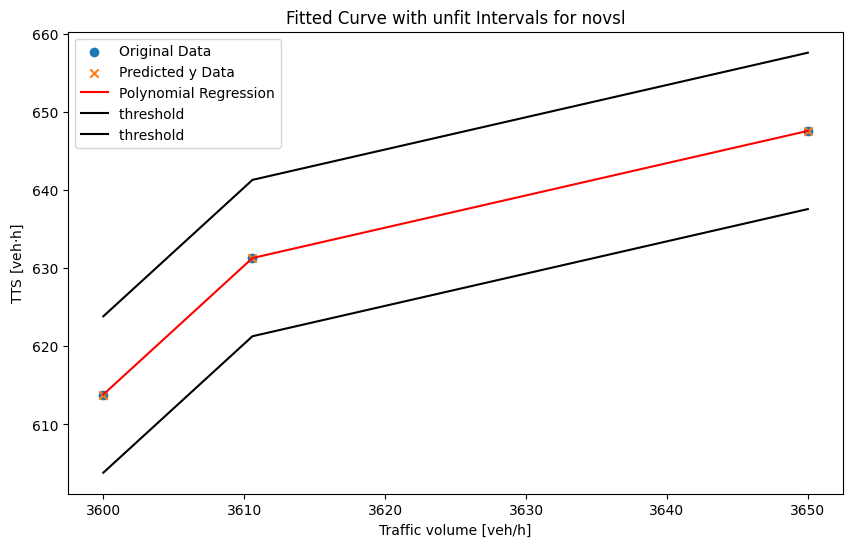

equation,
 y =  -1.737511326196434e-17x^6 + 2.6809189025469197e-16x^5 + 1.3827417320840754e-10x^4 + 6.660133516498365e-07x^3 + 0.0018074679489279689x^2 + 0.0011392794299051622x^1  -39453.60216450552 
unfit_points
 [(3600.0, 613.8194444444445), (3610.5871886120995, 631.277777777778), (3650.0, 647.5416666666665)] 
local_unfit_interval
, [[3568.0314125376403, 3652.2621817684094]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


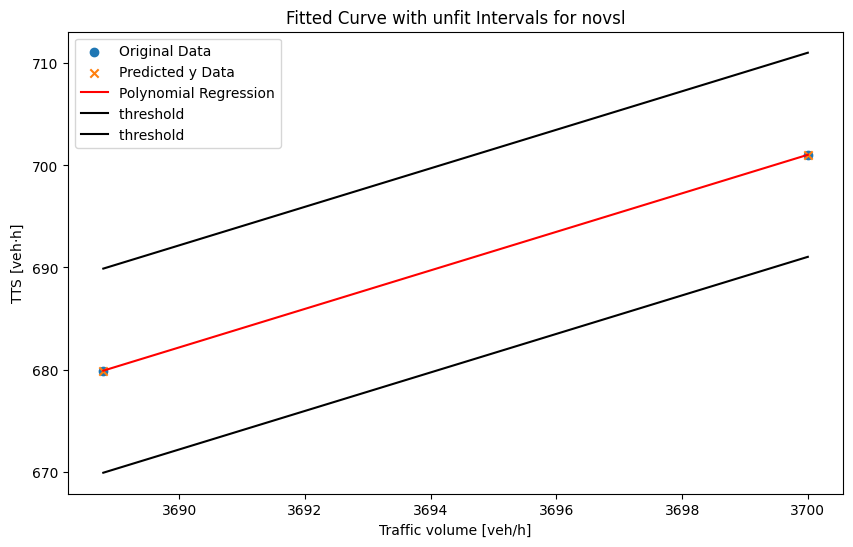

equation,
 y =  0.000246949718570139x^2 + 0.06230246126664007x^1  -2910.2190872451033 
unfit_points
 [(3688.790035587189, 679.8888888888888), (3700.0, 701.0416666666665)] 
local_unfit_interval
, [[3671.8128935121817, 3748.643238434164]]
This is UNFIT POINTS  [(3900.0, 769.7777777777777)]
DIFFERENCES 
each_interval  [3862.5, 3900.0] 
new_unfit_interval   []
MAIN interval list from VAL: [[3389.190391459075, 3450.0], [3862.5, 3900.0]]
Modifier...
[MODC]: intervals list:  [[3389.190391459075, 3450.0], [3862.5, 3900.0]]
[MODC]: (interval_min_tick, interval_max_tick):  (3389.190391459075, 3450.0)
[MODC]: mod_ticks:  [3400, 3425]
[MODC]: mod_x:  [3400.0, 3425.0]
[MODC]: (interval_min_tick, interval_max_tick):  (3862.5, 3900.0)
[MODC]: mod_ticks:  [3875]
[MODC]: mod_x:  [3875]
MAIN mod outcome ([[3400.0, 3425.0], [3875]], [[3389.190391459075, 3450.0], [3862.5, 3900.0]])
Simulator...
[[3400.0, 3425.0], [3875]]
 IN SIMULATE: [[3400.0, 3425.0], [3875]]
Flatten mod_x [3400.0, 3425.0, 3875]
x list 

Step #5400.00 (4ms ~= 62.50*RT, ~111250.00UPS, TraCI: 0ms, vehicles TOT 7529 ACT 445 BUF 0
MODX [3400.0, 3425.0, 3875] and sim_y_list [532.4027777777778, 528.3194444444445, 758.5555555555555]
MAIN modx [3400.0, 3425.0, 3875]
Validator...
What are POINTS  [[3400.0, 532.4027777777778], [3425.0, 528.3194444444445], [3875.0, 758.5555555555555], [3400.0, 532.4027777777778], [3444.6153846153848, 514.3055555555554], [3450.0, 570.3333333333334], (3900.0, 769.7777777777777)]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3389.190391459075, 3406.25]]


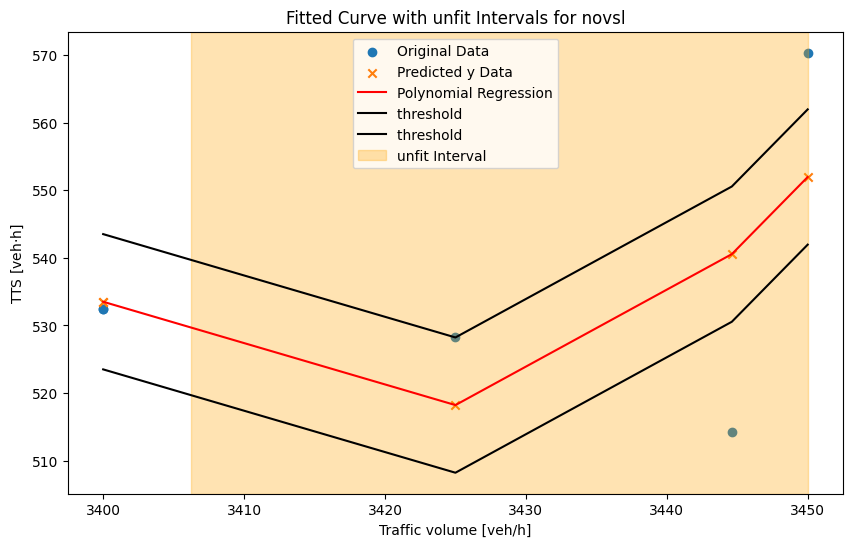

equation,
 y =  0.0392061269766426x^2  -268.19305276973057x^1 + 459167.06323049736 
unfit_points
 [(3400.0, 532.4027777777778), (3400.0, 532.4027777777778), (3425.0, 528.3194444444445), (3444.6153846153848, 514.3055555555554), (3450.0, 570.3333333333334)] 
local_unfit_interval
, [[3389.190391459075, 3406.25]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


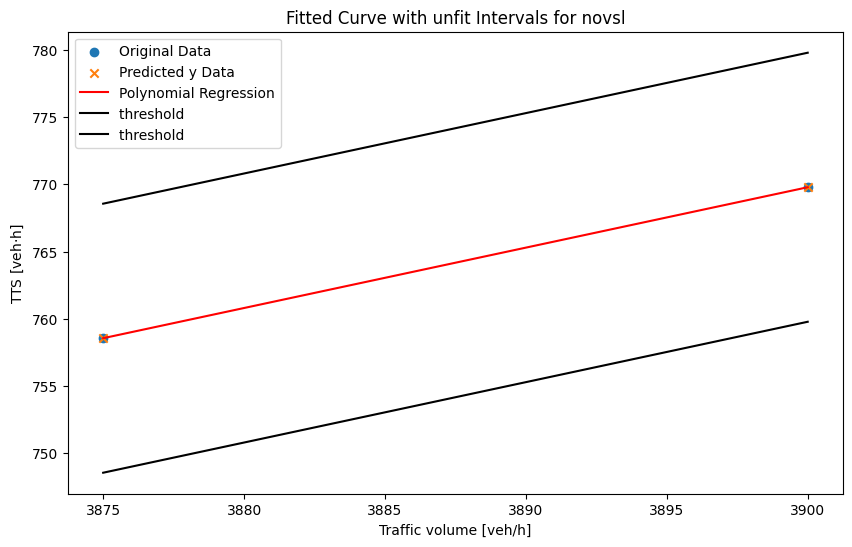

equation,
 y =  4.9307064610161575e-05x^2 + 0.06552646154487894x^1  -235.7358749678075 
unfit_points
 [(3875.0, 758.5555555555555), (3900.0, 769.7777777777777)] 
local_unfit_interval
, [[3862.5, 3900.0]]
DIFFERENCES 
each_interval  [3862.5, 3900.0] 
new_unfit_interval   []
MAIN interval list from VAL: [[3406.25, 3450.0]]
Modifier...
[MODC]: intervals list:  [[3406.25, 3450.0]]
MAIN mod outcome (False, [[3406.25, 3450.0]])


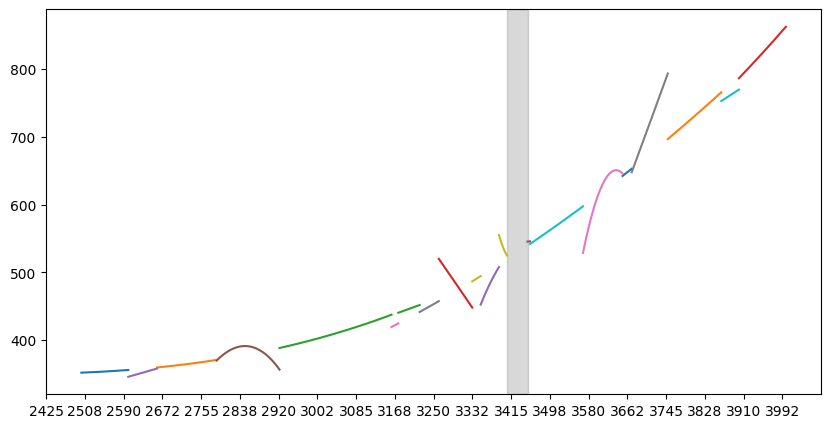

In [1]:
# IMPORT LIBRARIES
import numpy as np

from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
from logger_utils import Logger

import pickle
import datetime
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

validator_controller_novsl = ValidatorController("novsl")
logger = Logger()
logger_main_arguments = {}
is_main_func = True
# Initialize interval list for the first iteration
intervals_list=[[mds['domain_min_interval'], mds['domain_max_interval']]]
#intervals_list=[[2900, 3200]]
# Values for the timestamp of the pickle file
count = 0
filename1 = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

while is_main_func:
    
    # Calls Modifier Controller
    mod_outcome = ModifierController.control(intervals_list=intervals_list,selected_modifier=components['modifierA'], do_plot=simexSettings['do_plot'])
    mod_x_list = mod_outcome[0]
    checked_intervals = mod_outcome[1]
    print("MAIN mod outcome", mod_outcome)  

    
    # breaks loop if iterations end by granularity reached
    if not mod_x_list: # FALSE IF ['modifier_data_point'] < mdv['modifier_incremental_unit']:
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no generated points'
        logger_main_arguments['remaining_unfit_intervals'] = checked_intervals
        logger.log_main(logger_main_arguments)
        break
    
    # Calls Simulator
    mod_x,sim_y_list = SimulatorController.simulate(mod_x_list,selected_simulator=components['sumo_simulator_novsl'])
    print(f"MODX {mod_x} and sim_y_list {sim_y_list}")
    assert len(mod_x) == len(sim_y_list)

    print("MAIN modx", mod_x)  

    # Calls Validator controller
    intervals_list =  validator_controller_novsl.validate(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list), selected_validator=components['validator'],global_interval=[mds["domain_min_interval"], mds["domain_max_interval"]])
    print("MAIN interval list from VAL:", intervals_list)
    # Loop number (loop-1,loop2..etc)
    count +=1
    save_object(validator_controller_novsl,f"vc_novsl_loop-{count}-{filename1}.pkl")
    
    # Updates interval_list to new range output from validator controller
    # No more unfit intervals -> write MAIN log
    if not intervals_list:
        is_main_func = False
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no unfit intervals'
        logger.log_main(logger_main_arguments)

# MAIN cycle completed/interrupted -> write OVERALL statistics        
logger_main_arguments['log_contex'] = 'Overall Stats'                          
logger_main_arguments['main_status'] = 'end cycle'
logger.log_main(logger_main_arguments)
